## import required python packages


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

## import loan.csv file and print first 5 records

In [2]:
loan = pd.read_csv('loan.csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

## Data cleanup 
1. Remove columns with more than 50% NaN values
2. Remove all useless columns for analysis. e.g. id, member_id, application_type
3. replace all NaN with 0
4. remove % sign
5. Convert interest rate to float
6. Remove records with employment length as n/a

In [4]:
null_columns = [i for i in loan.columns if loan[i].isnull().sum() > 0.5*(len(loan))]

In [5]:
loan = loan.drop(columns= null_columns)

In [6]:
loan = loan.drop(columns=["id", "member_id", "application_type"])

In [7]:
loan = loan.fillna(0)

In [8]:
loan.int_rate = loan.int_rate.apply(lambda x : x[:-1])

In [9]:
loan.int_rate = loan.int_rate.astype(float)

In [10]:
loan = loan[loan.emp_length != "n/a"]

In [11]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,0,10+ years,...,Jan-15,171.62,May-16,0.0,1,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,Apr-13,119.66,Sep-13,0.0,1,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,0,10+ years,...,Jun-14,649.91,May-16,0.0,1,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Jan-15,357.48,Apr-16,0.0,1,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,May-16,67.79,May-16,0.0,1,0,0.0,0,0.0,0.0


## Outliers removal
### Box plot the loan amount to remove the outliers

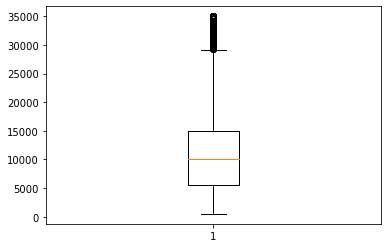

In [12]:
plt.boxplot(loan.loan_amnt)
plt.show()

#### Remove all the records having loan amount greater than 30000

In [13]:
loan = loan[loan.loan_amnt <= 30000]

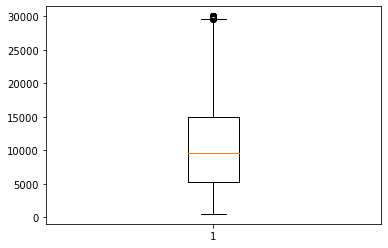

In [14]:
plt.boxplot(loan.loan_amnt)
plt.show()

### boxplot annual income to remove outliers

##### remove all records with more than 100,000 annual income

In [15]:
loan = loan[loan.annual_inc < 100000]

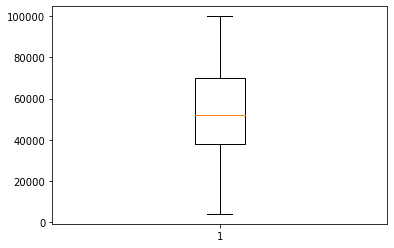

In [16]:
plt.boxplot(loan.annual_inc)
plt.show()

## Univariate analysis on all loan accounts
    1. Loan Amount 
    2. Interest rate
    3. Loan status
      

In [17]:
loan.loan_amnt.describe()

count    33155.000000
mean      9990.154577
std       6259.765639
min        500.000000
25%       5000.000000
50%       8650.000000
75%      14000.000000
max      30000.000000
Name: loan_amnt, dtype: float64

## Font dict for the label and title

In [46]:
label_font = {'fontsize': 15, 'fontweight' : 15, 'color' : 'Blue'}
title_font = {"fontsize": 20, "fontweight": 20, "color": "Green"}

## Overall loan account status 

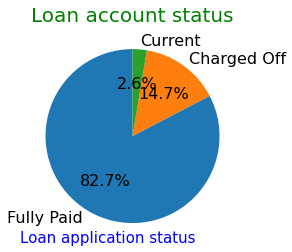

In [35]:
loan.loan_status.value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)
plt.title("Loan account status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.ylabel("Loan application status", fontdict=label_font, loc="bottom", rotation=360)
plt.show()

## Statewise loan applications

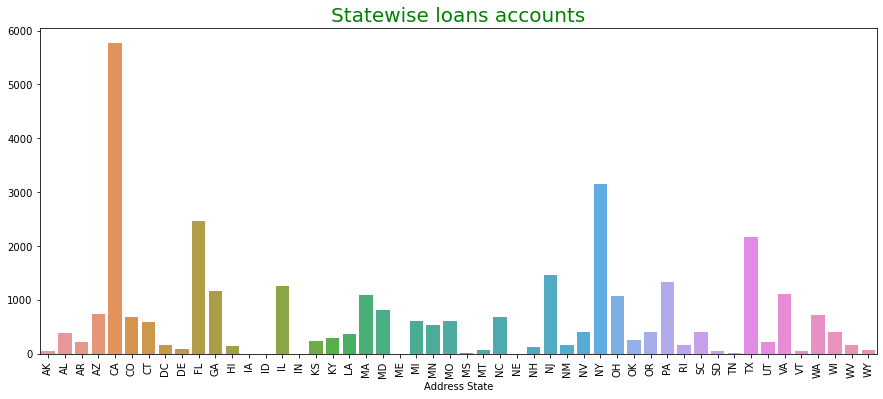

In [47]:
plt.figure(figsize=(15,6))
loan_state = loan.groupby(["addr_state"])['loan_status'].count()
sns.barplot(loan_state.index, loan_state.values)
plt.xticks(rotation=90)
plt.xlabel("Address State")
plt.title("Statewise loans accounts", fontdict=title_font)
plt.show()

## Filter out Fully Paid loan accounts for analysis¶

In [21]:
fully_paid = loan[loan.loan_status == "Fully Paid"]

## Filter out charged off loan account for analysis

In [22]:
charged_off = loan[loan.loan_status == "Charged Off"]

## Percentage of charged off loans across different states

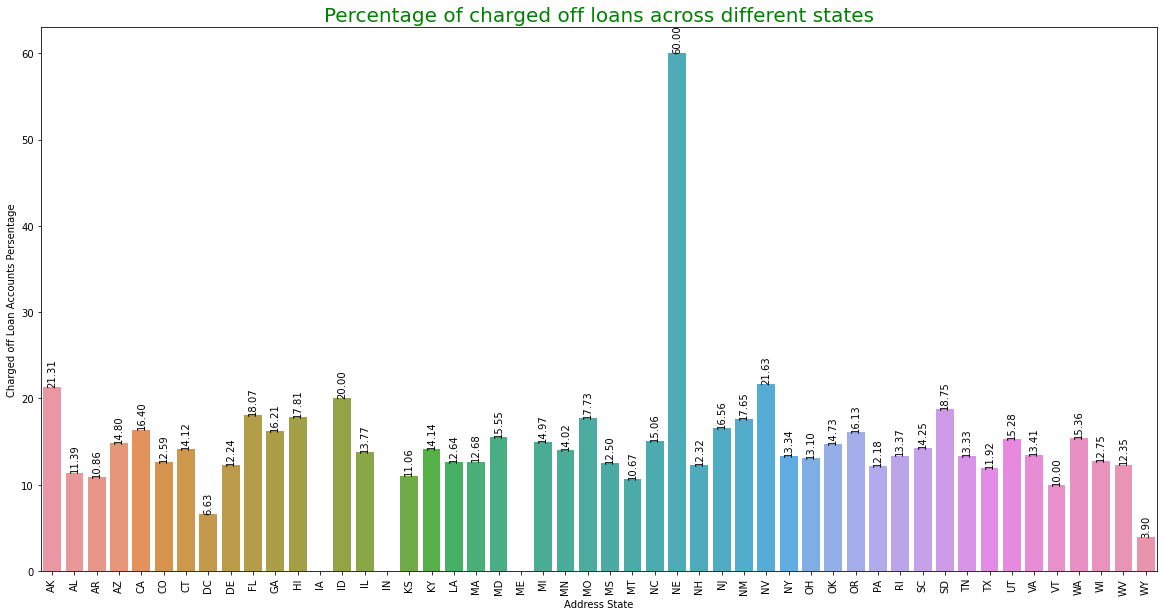

In [48]:
plt.figure(figsize=(20,10))
charged_off_state = charged_off.groupby(["addr_state"])['loan_status'].count()
percentage_charged_off_loan = (charged_off_state/loan_state * 100)

ax = sns.barplot(percentage_charged_off_loan.index, percentage_charged_off_loan.values)
ax.bar_label(ax.containers[0], fmt='%0.2f', rotation=90)

plt.xlabel("Address State")
plt.ylabel("Charged off Loan Accounts Persentage")
plt.xticks(rotation=90)
plt.title("Percentage of charged off loans across different states", fontdict=title_font)
plt.show()

## Employment length wise charged off loan percentage

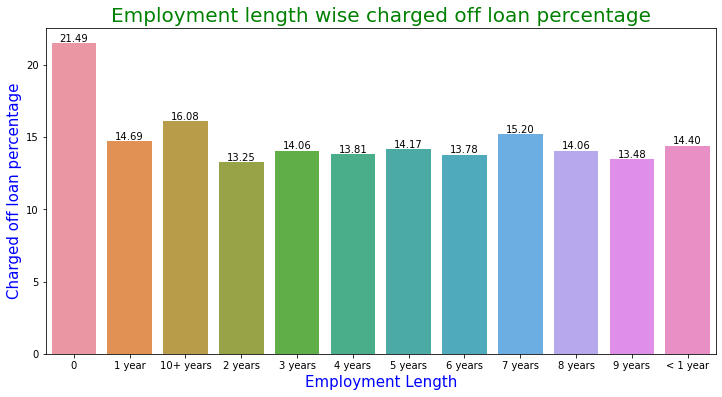

In [49]:
plt.figure(figsize=(12,6))
loan_emp_length = loan.groupby(["emp_length"])['loan_status'].count()
charged_off_emp_length = charged_off.groupby(["emp_length"])['loan_status'].count()
percentage_charged_off_loan = (charged_off_emp_length/loan_emp_length * 100)

ax = sns.barplot(percentage_charged_off_loan.index, percentage_charged_off_loan.values)
ax.bar_label(ax.containers[0], fmt='%0.2f')

plt.title("Employment length wise charged off loan percentage", fontdict=title_font)
plt.xlabel("Employment Length", fontdict=label_font)
plt.ylabel("Charged off loan percentage", fontdict=label_font)
plt.show()

## Percentage of charged off loans across Home ownership status 

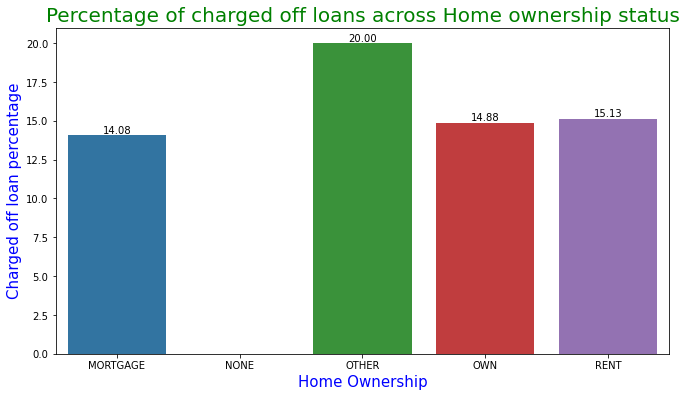

In [50]:
plt.figure(figsize=(11,6))
loan_home_ownership = loan.groupby(["home_ownership"])['loan_status'].count()
charged_off_home_ownership = charged_off.groupby(["home_ownership"])['loan_status'].count()
percentage_charged_off_loan = (charged_off_home_ownership/loan_home_ownership * 100)

ax = sns.barplot(percentage_charged_off_loan.index, percentage_charged_off_loan.values)
ax.bar_label(ax.containers[0], fmt='%0.2f')

plt.xlabel("Home Ownership", fontdict=label_font)
plt.ylabel("Charged off loan percentage", fontdict=label_font)
plt.title("Percentage of charged off loans across Home ownership status", fontdict=title_font)
plt.show()

## Loan purpose wise charged off loan account percentage

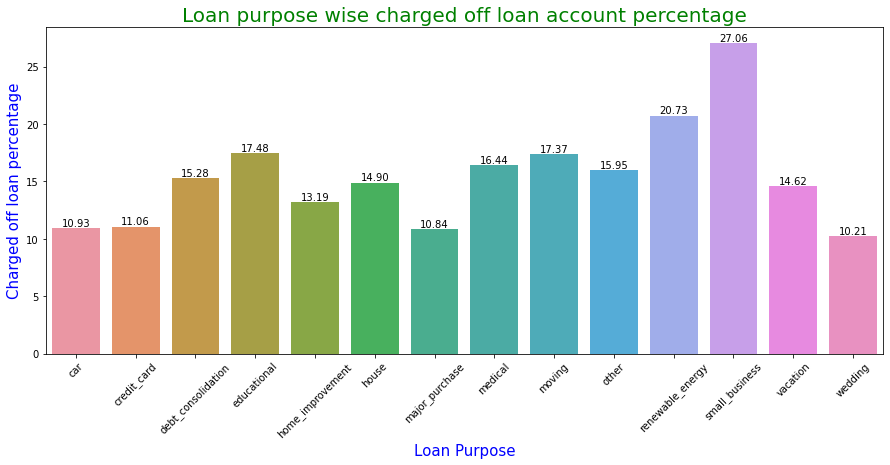

In [51]:
plt.figure(figsize=(15,6))
loan_purpose = loan.groupby(["purpose"])['loan_status'].count()
charged_off_purpose = charged_off.groupby(["purpose"])['loan_status'].count()
percentage_charged_off_loan = (charged_off_purpose/loan_purpose * 100)

ax = sns.barplot(percentage_charged_off_loan.index, percentage_charged_off_loan.values)
ax.bar_label(ax.containers[0], fmt='%0.2f')

plt.xticks(rotation=45)
plt.xlabel("Loan Purpose", fontdict=label_font)
plt.ylabel("Charged off loan percentage", fontdict=label_font)
plt.title("Loan purpose wise charged off loan account percentage", fontdict=title_font)
plt.show()

## Percentage of charged off loans across different loan grades

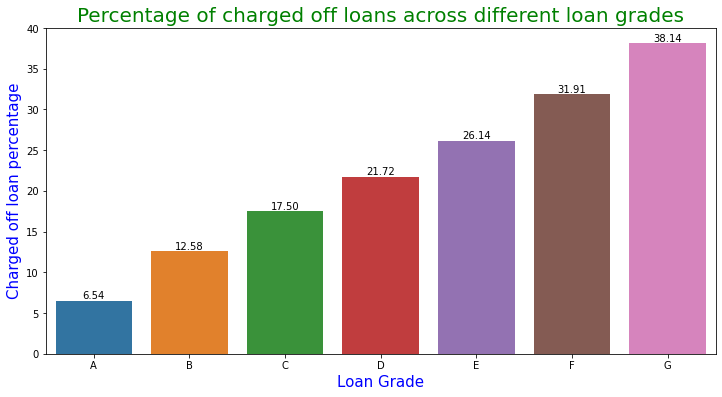

In [52]:
plt.figure(figsize=(12,6))
loan_grade = loan.groupby(["grade"])['loan_status'].count()
charged_off_grade = charged_off.groupby(["grade"])['loan_status'].count()
percentage_charged_off_loan = (charged_off_grade/loan_grade * 100)

ax = sns.barplot(percentage_charged_off_loan.index, percentage_charged_off_loan.values)
ax.bar_label(ax.containers[0], fmt='%0.2f')

plt.xlabel("Loan Grade", fontdict=label_font)
plt.ylabel("Charged off loan percentage", fontdict=label_font)
plt.title("Percentage of charged off loans across different loan grades", fontdict=title_font)
plt.show()

## Charged off loan distribution based on income varification

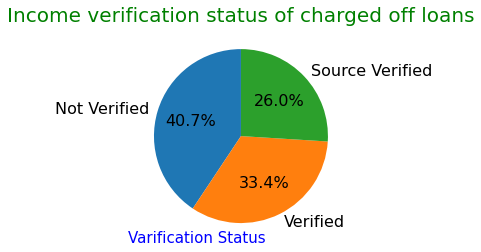

In [53]:
charged_off.verification_status.value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)
plt.title("Income verification status of charged off loans", fontdict=title_font)
plt.ylabel("Varification Status", rotation=360, loc="bottom", fontdict=label_font)
plt.show()

## Median intertest rate for income source varification and house ownership

In [29]:
loans_home_ownership = pd.pivot_table(data=loan,index="verification_status",columns="home_ownership",values="int_rate",aggfunc=np.mean)

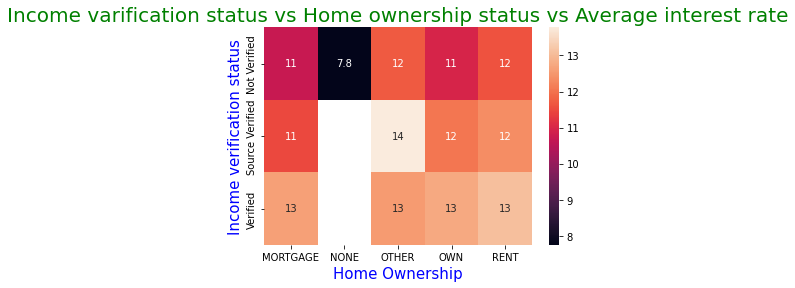

In [54]:
sns.heatmap(loans_home_ownership, annot=True)
plt.title("Income varification status vs Home ownership status vs Average interest rate", fontdict=title_font)
plt.xlabel("Home Ownership", fontdict=label_font)
plt.ylabel("Income verification status", fontdict=label_font)
plt.show()

## Loan status vs varification status vs avg annual income

In [31]:
loans_income_status = pd.pivot_table(data=loan,index="verification_status", columns="loan_status",values="annual_inc",aggfunc=np.mean)

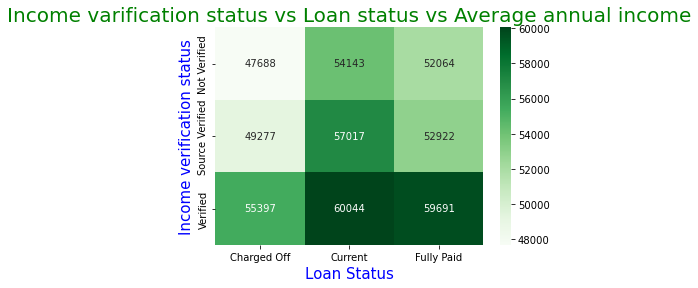

In [55]:
sns.heatmap(loans_income_status, annot=True, cmap = "Greens", fmt="0.0f")
plt.title("Income varification status vs Loan status vs Average annual income", fontdict=title_font)
plt.xlabel("Loan Status", fontdict=label_font)
plt.ylabel("Income verification status", fontdict=label_font)
plt.show()

# Findings

- Loans applications more likely to be Charged Off
    - Loan applications from Nebraska, South Dakota or Nevada
    - Loans given to Small Businesses, Renewable Energy and Educational purpose
    - Loans applications from Other home owners
    - Grade G, F, E loan application 
    - Loan application from a person without any work experience or unemployed.

- Loan application more likely to be Fully Paid

    - Loan applications from Wyoming, Washington D. C. & Vermont
    
    - Loans taken for Wedding, Major Purpose or Car
    
    - Grade A, B, C loan applications


# Recommendations

- Charge higher interest rates to loan applications having higher chances be Charged Off. 

- Increase income source verification percentage of loan applications.

- Reject the loan applications having less than 50K annual income or without any work experience. 

- Married person is more likely to be repay loans.

